# New section

In [ ]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!pip install -q kaggle
!kaggle datasets download -d briscdataset/brisc2025
!unzip -q brisc2025.zip -d ./archive


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/briscdataset/brisc2025
License(s): Attribution 4.0 International (CC BY 4.0)
 61% 152M/250M [00:00<00:00, 1.58GB/s]
100% 250M/250M [00:00<00:00, 875MB/s] 


In [ ]:
# IMPORTS
import os
import torch
import torch.nn as nn
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torch.utils.data import Dataset, DataLoader
from glob import glob
import cv2
import numpy as np
from tqdm import tqdm
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.functional as F
from PIL import Image




In [ ]:



# Set paths
image_input_dir = "./archive/brisc2025/segmentation_task/train/images"          # folder containing original .jpg images
mask_input_dir = "./archive/brisc2025/segmentation_task/train/masks"            # folder containing original .png masks

image_output_dir = "./archive/brisc2025/segmentation_input/train/images" # folder to save resized images
mask_output_dir = "./archive/brisc2025/segmentation_input/train/masks"   # folder to save resized masks

# Desired output size
new_size = (256, 256)   # (width, height)

# Create output directories if they don't exist
os.makedirs(image_output_dir, exist_ok=True)
os.makedirs(mask_output_dir, exist_ok=True)


def resize_image(input_path, output_path, size, is_mask=False):
    img = Image.open(input_path)

    # For masks → nearest neighbor (keeps integer class values)
    if is_mask:
        img = img.resize(size, Image.NEAREST)
    else:
        # For images → bilinear interpolation
        img = img.resize(size, Image.BILINEAR)

    img.save(output_path)


# Resize all JPG images
for filename in os.listdir(image_input_dir):
    if filename.lower().endswith(".jpg"):
        input_path = os.path.join(image_input_dir, filename)
        output_path = os.path.join(image_output_dir, filename)
        resize_image(input_path, output_path, new_size, is_mask=False)
        print("Resized image:", filename)

# Resize all PNG masks
for filename in os.listdir(mask_input_dir):
    if filename.lower().endswith(".png"):
        input_path = os.path.join(mask_input_dir, filename)
        output_path = os.path.join(mask_output_dir, filename)
        resize_image(input_path, output_path, new_size, is_mask=True)
        print("Resized mask:", filename)

print("Done! Images and masks resized and saved.")

# Set paths
image_input_dir = "./archive/brisc2025/segmentation_task/test/images"          # folder containing original .jpg images
mask_input_dir = "./archive/brisc2025/segmentation_task/test/masks"            # folder containing original .png masks

image_output_dir = "./archive/brisc2025/segmentation_input/test/images" # folder to save resized images
mask_output_dir = "./archive/brisc2025/segmentation_input/test/masks"   # folder to save resized masks

# Desired output size
new_size = (256, 256)   # (width, height)

# Create output directories if they don't exist
os.makedirs(image_output_dir, exist_ok=True)
os.makedirs(mask_output_dir, exist_ok=True)


def resize_image(input_path, output_path, size, is_mask=False):
    img = Image.open(input_path)

    # For masks → nearest neighbor (keeps integer class values)
    if is_mask:
        img = img.resize(size, Image.NEAREST)
    else:
        # For images → bilinear interpolation
        img = img.resize(size, Image.BILINEAR)

    img.save(output_path)


# Resize all JPG images
for filename in os.listdir(image_input_dir):
    if filename.lower().endswith(".jpg"):
        input_path = os.path.join(image_input_dir, filename)
        output_path = os.path.join(image_output_dir, filename)
        resize_image(input_path, output_path, new_size, is_mask=False)
        print("Resized image:", filename)

# Resize all PNG masks
for filename in os.listdir(mask_input_dir):
    if filename.lower().endswith(".png"):
        input_path = os.path.join(mask_input_dir, filename)
        output_path = os.path.join(mask_output_dir, filename)
        resize_image(input_path, output_path, new_size, is_mask=True)
        print("Resized mask:", filename)

print("Done! Images and masks resized and saved.")

Streaming output truncated to the last 5000 lines.
Resized mask: brisc2025_train_04938_pi_sa_t1.png
Resized mask: brisc2025_train_03693_pi_ax_t1.png
Resized mask: brisc2025_train_00926_gl_sa_t1.png
Resized mask: brisc2025_train_03914_pi_ax_t1.png
Resized mask: brisc2025_train_01220_me_ax_t1.png
Resized mask: brisc2025_train_00041_gl_ax_t1.png
Resized mask: brisc2025_train_00510_gl_co_t1.png
Resized mask: brisc2025_train_00997_gl_sa_t1.png
Resized mask: brisc2025_train_04892_pi_sa_t1.png
Resized mask: brisc2025_train_01043_gl_sa_t1.png
Resized mask: brisc2025_train_01358_me_ax_t1.png
Resized mask: brisc2025_train_03666_pi_ax_t1.png
Resized mask: brisc2025_train_04116_pi_co_t1.png
Resized mask: brisc2025_train_01870_me_co_t1.png
Resized mask: brisc2025_train_01737_me_co_t1.png
Resized mask: brisc2025_train_00720_gl_co_t1.png
Resized mask: brisc2025_train_04164_pi_co_t1.png
Resized mask: brisc2025_train_04248_pi_co_t1.png
Resized mask: brisc2025_train_01411_me_ax_t1.png
Resized mask: bris

CUDA Available: True
CUDA Device Name: Tesla T4
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 256, 256]             576
            Conv2d-2         [-1, 64, 256, 256]              64
       BatchNorm2d-3         [-1, 64, 256, 256]             128
              ReLU-4         [-1, 64, 256, 256]               0
            Conv2d-5         [-1, 64, 256, 256]          36,864
        ConvBlock1-6         [-1, 64, 256, 256]               0
       BatchNorm2d-7         [-1, 64, 256, 256]             128
              ReLU-8         [-1, 64, 256, 256]               0
            Conv2d-9        [-1, 128, 128, 128]           8,192
           Conv2d-10        [-1, 128, 128, 128]          73,728
      BatchNorm2d-11        [-1, 128, 128, 128]             256
             ReLU-12        [-1, 128, 128, 128]               0
           Conv2d-13        [-1, 128, 128, 128]        

/tmp/ipython-input-1030804771.py:216: UserWarning: Argument(s) 'var_limit' are not valid for transform GaussNoise
  A.GaussNoise(var_limit=(5, 15), p=0.2),



Epoch [1/40]


Training:   0%|          | 0/245 [00:00<?, ?it/s]/tmp/ipython-input-1030804771.py:411: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Train Loss: 0.5609 | Val Loss: 0.3431 | Pixel Acc: 98.20% | Pixel Err: 1.80% | Dice: 0.5136 | IoU: 0.4015
Saved best model! Dice=0.5136

Epoch [2/40]


Train Loss: 0.4573 | Val Loss: 0.3169 | Pixel Acc: 98.86% | Pixel Err: 1.14% | Dice: 0.5403 | IoU: 0.4538
Saved best model! Dice=0.5403

Epoch [3/40]


Train Loss: 0.4323 | Val Loss: 0.2684 | Pixel Acc: 98.93% | Pixel Err: 1.07% | Dice: 0.6205 | IoU: 0.5276
Saved best model! Dice=0.6205

Epoch [4/40]


Train Loss: 0.4197 | Val Loss: 0.2828 | Pixel Acc: 98.91% | Pixel Err: 1.09% | Dice: 0.5966 | IoU: 0.5071

Epoch [5/40]


Train Loss: 0.4076 | Val Loss: 0.2126 | Pixel Acc: 99.10% | Pixel Err: 0.90% | Dice: 0.6933 | IoU: 0.6071
Saved best model! Dice=0.6933
Testing on image: ./archive/brisc2025/segmentation_input/test/images/brisc2025_test_00001_gl_ax_t1.jpg
Image shape: (256, 256)
Model device: cuda:0
Model training mode?: False


/tmp/ipython-input-1030804771.py:383: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(), torch.no_grad():


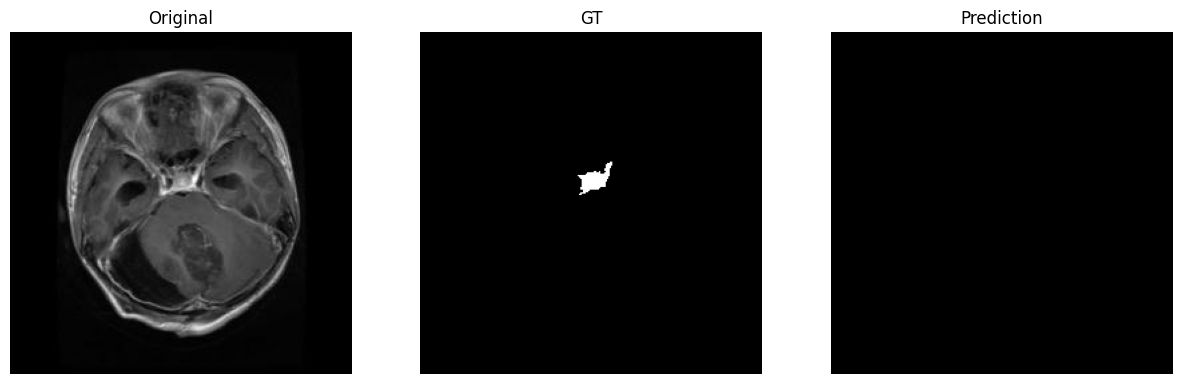

Full Image Dice: 0.0000 | IoU: 0.0000

Epoch [6/40]


Train Loss: 0.3970 | Val Loss: 0.2030 | Pixel Acc: 99.06% | Pixel Err: 0.94% | Dice: 0.7087 | IoU: 0.6116
Saved best model! Dice=0.7087

Epoch [7/40]


Train Loss: 0.3940 | Val Loss: 0.1969 | Pixel Acc: 99.08% | Pixel Err: 0.92% | Dice: 0.7168 | IoU: 0.6195
Saved best model! Dice=0.7168

Epoch [8/40]


Train Loss: 0.3811 | Val Loss: 0.1986 | Pixel Acc: 99.08% | Pixel Err: 0.92% | Dice: 0.7138 | IoU: 0.6177

Epoch [9/40]


Train Loss: 0.3752 | Val Loss: 0.1724 | Pixel Acc: 99.22% | Pixel Err: 0.78% | Dice: 0.7515 | IoU: 0.6621
Saved best model! Dice=0.7515

Epoch [10/40]


Train Loss: 0.3731 | Val Loss: 0.1699 | Pixel Acc: 99.22% | Pixel Err: 0.78% | Dice: 0.7519 | IoU: 0.6610
Saved best model! Dice=0.7519
Testing on image: ./archive/brisc2025/segmentation_input/test/images/brisc2025_test_00001_gl_ax_t1.jpg
Image shape: (256, 256)
Model device: cuda:0
Model training mode?: False


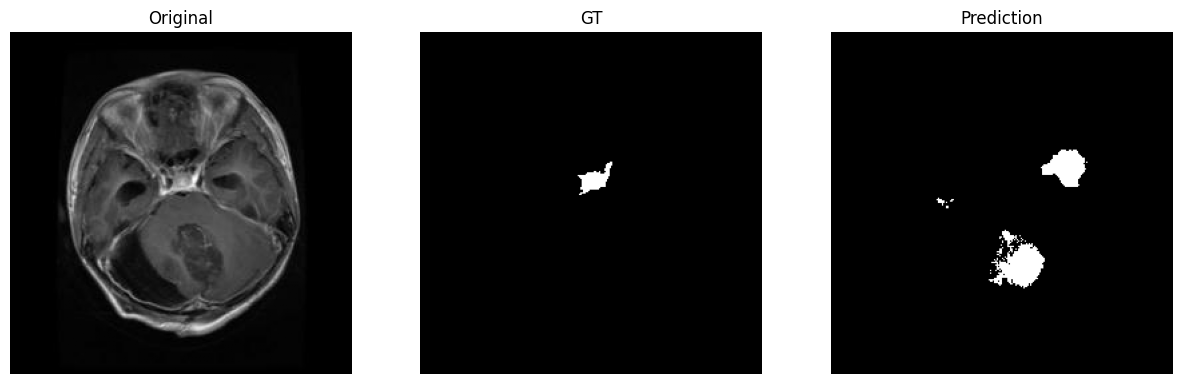

Full Image Dice: 0.0000 | IoU: 0.0000

Epoch [11/40]


Train Loss: 0.3713 | Val Loss: 0.1751 | Pixel Acc: 99.22% | Pixel Err: 0.78% | Dice: 0.7447 | IoU: 0.6543

Epoch [12/40]


Train Loss: 0.3683 | Val Loss: 0.1686 | Pixel Acc: 99.27% | Pixel Err: 0.73% | Dice: 0.7549 | IoU: 0.6691
Saved best model! Dice=0.7549

Epoch [13/40]


Train Loss: 0.3661 | Val Loss: 0.1649 | Pixel Acc: 99.22% | Pixel Err: 0.78% | Dice: 0.7600 | IoU: 0.6656
Saved best model! Dice=0.7600

Epoch [14/40]


Train Loss: 0.3647 | Val Loss: 0.1668 | Pixel Acc: 99.20% | Pixel Err: 0.80% | Dice: 0.7570 | IoU: 0.6633

Epoch [15/40]


Train Loss: 0.3601 | Val Loss: 0.1423 | Pixel Acc: 99.35% | Pixel Err: 0.65% | Dice: 0.7899 | IoU: 0.7042
Saved best model! Dice=0.7899
Testing on image: ./archive/brisc2025/segmentation_input/test/images/brisc2025_test_00001_gl_ax_t1.jpg
Image shape: (256, 256)
Model device: cuda:0
Model training mode?: False


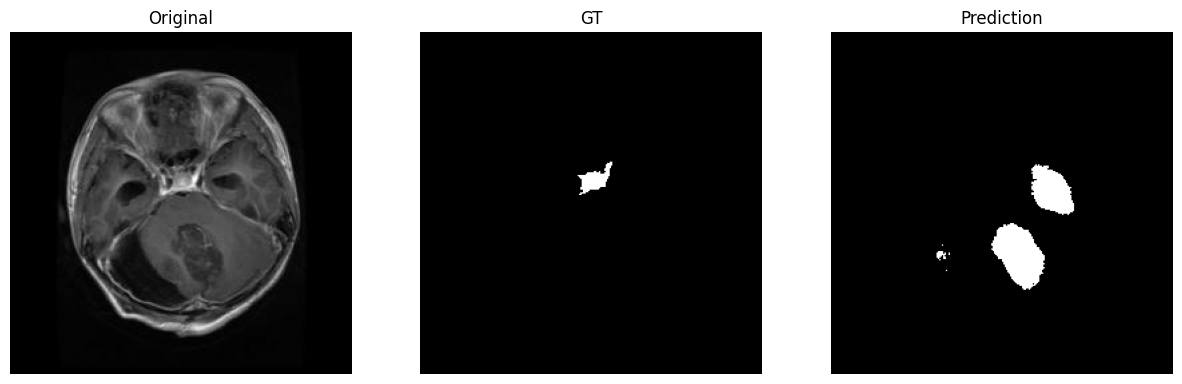

Full Image Dice: 0.0000 | IoU: 0.0000

Epoch [16/40]


Train Loss: 0.3561 | Val Loss: 0.1456 | Pixel Acc: 99.32% | Pixel Err: 0.68% | Dice: 0.7875 | IoU: 0.6996

Epoch [17/40]


Train Loss: 0.3612 | Val Loss: 0.1601 | Pixel Acc: 99.27% | Pixel Err: 0.73% | Dice: 0.7666 | IoU: 0.6796

Epoch [18/40]


Train Loss: 0.3574 | Val Loss: 0.1448 | Pixel Acc: 99.34% | Pixel Err: 0.66% | Dice: 0.7896 | IoU: 0.7077

Epoch [19/40]


Train Loss: 0.3446 | Val Loss: 0.1311 | Pixel Acc: 99.41% | Pixel Err: 0.59% | Dice: 0.8074 | IoU: 0.7253
Saved best model! Dice=0.8074

Epoch [20/40]


Train Loss: 0.3438 | Val Loss: 0.1310 | Pixel Acc: 99.42% | Pixel Err: 0.58% | Dice: 0.8069 | IoU: 0.7274
Testing on image: ./archive/brisc2025/segmentation_input/test/images/brisc2025_test_00001_gl_ax_t1.jpg
Image shape: (256, 256)
Model device: cuda:0
Model training mode?: False


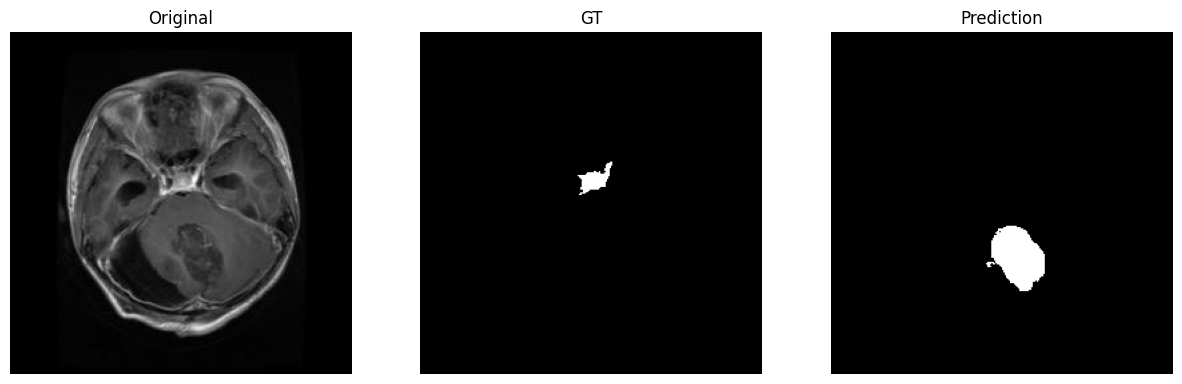

Full Image Dice: 0.0000 | IoU: 0.0000

Epoch [21/40]


Train Loss: 0.3405 | Val Loss: 0.1282 | Pixel Acc: 99.42% | Pixel Err: 0.58% | Dice: 0.8127 | IoU: 0.7313
Saved best model! Dice=0.8127

Epoch [22/40]


Train Loss: 0.3404 | Val Loss: 0.1355 | Pixel Acc: 99.36% | Pixel Err: 0.64% | Dice: 0.8012 | IoU: 0.7170

Epoch [23/40]


Train Loss: 0.3406 | Val Loss: 0.1281 | Pixel Acc: 99.43% | Pixel Err: 0.57% | Dice: 0.8119 | IoU: 0.7327

Epoch [24/40]


Train Loss: 0.3415 | Val Loss: 0.1266 | Pixel Acc: 99.43% | Pixel Err: 0.57% | Dice: 0.8141 | IoU: 0.7344
Saved best model! Dice=0.8141

Epoch [25/40]


Train Loss: 0.3368 | Val Loss: 0.1300 | Pixel Acc: 99.42% | Pixel Err: 0.58% | Dice: 0.8102 | IoU: 0.7299
Testing on image: ./archive/brisc2025/segmentation_input/test/images/brisc2025_test_00001_gl_ax_t1.jpg
Image shape: (256, 256)
Model device: cuda:0
Model training mode?: False


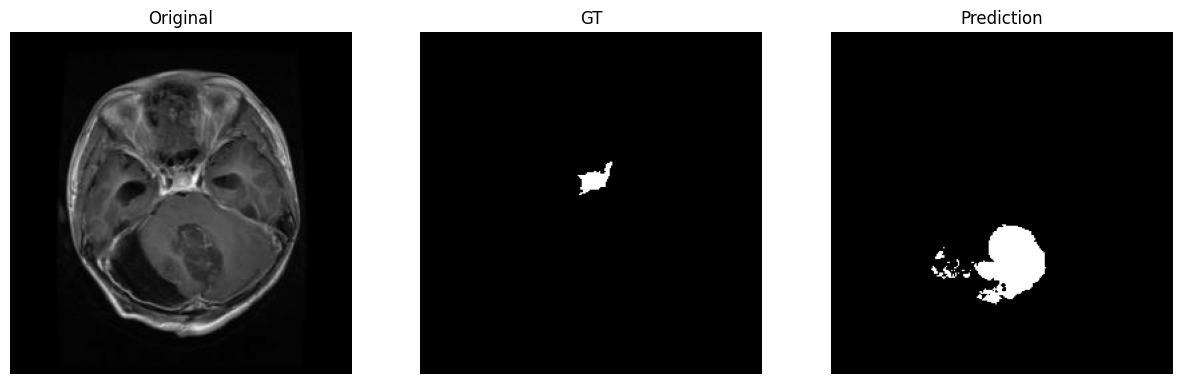

Full Image Dice: 0.0000 | IoU: 0.0000

Epoch [26/40]


Train Loss: 0.3366 | Val Loss: 0.1296 | Pixel Acc: 99.41% | Pixel Err: 0.59% | Dice: 0.8099 | IoU: 0.7316

Epoch [27/40]


Train Loss: 0.3372 | Val Loss: 0.1231 | Pixel Acc: 99.44% | Pixel Err: 0.56% | Dice: 0.8205 | IoU: 0.7409
Saved best model! Dice=0.8205

Epoch [28/40]


Train Loss: 0.3335 | Val Loss: 0.1248 | Pixel Acc: 99.47% | Pixel Err: 0.53% | Dice: 0.8172 | IoU: 0.7431

Epoch [29/40]


Train Loss: 0.3327 | Val Loss: 0.1277 | Pixel Acc: 99.36% | Pixel Err: 0.64% | Dice: 0.8147 | IoU: 0.7306

Epoch [30/40]


Train Loss: 0.3345 | Val Loss: 0.1273 | Pixel Acc: 99.46% | Pixel Err: 0.54% | Dice: 0.8130 | IoU: 0.7370
Testing on image: ./archive/brisc2025/segmentation_input/test/images/brisc2025_test_00001_gl_ax_t1.jpg
Image shape: (256, 256)
Model device: cuda:0
Model training mode?: False


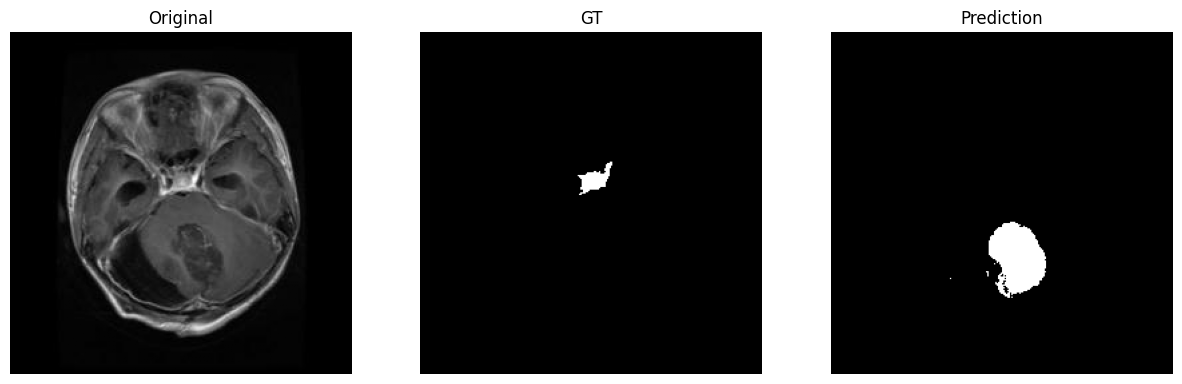

Full Image Dice: 0.0000 | IoU: 0.0000

Epoch [31/40]


Train Loss: 0.3273 | Val Loss: 0.1137 | Pixel Acc: 99.52% | Pixel Err: 0.48% | Dice: 0.8330 | IoU: 0.7585
Saved best model! Dice=0.8330

Epoch [32/40]


Train Loss: 0.3262 | Val Loss: 0.1135 | Pixel Acc: 99.52% | Pixel Err: 0.48% | Dice: 0.8325 | IoU: 0.7568

Epoch [33/40]


Train Loss: 0.3261 | Val Loss: 0.1152 | Pixel Acc: 99.51% | Pixel Err: 0.49% | Dice: 0.8297 | IoU: 0.7544

Epoch [34/40]


Train Loss: 0.3233 | Val Loss: 0.1126 | Pixel Acc: 99.51% | Pixel Err: 0.49% | Dice: 0.8334 | IoU: 0.7578
Saved best model! Dice=0.8334

Epoch [35/40]


Train Loss: 0.3219 | Val Loss: 0.1118 | Pixel Acc: 99.51% | Pixel Err: 0.49% | Dice: 0.8351 | IoU: 0.7597
Saved best model! Dice=0.8351
Testing on image: ./archive/brisc2025/segmentation_input/test/images/brisc2025_test_00001_gl_ax_t1.jpg
Image shape: (256, 256)
Model device: cuda:0
Model training mode?: False


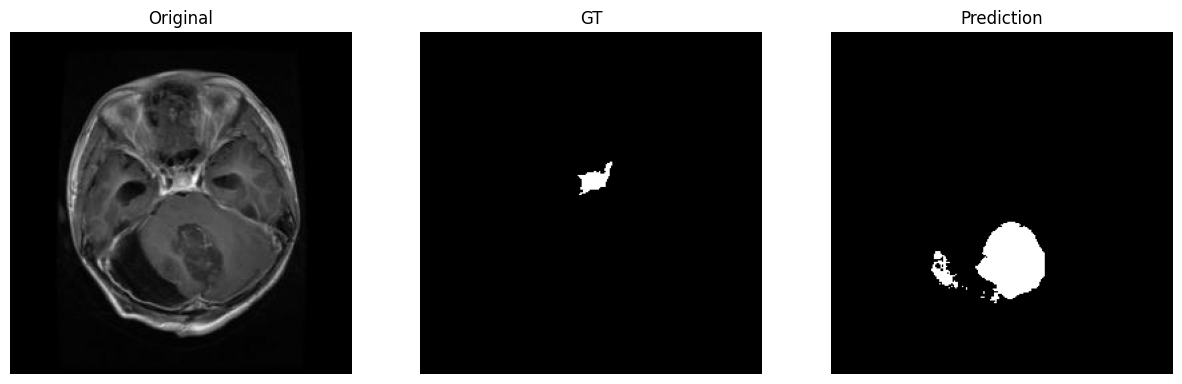

Full Image Dice: 0.0000 | IoU: 0.0000

Epoch [36/40]


Train Loss: 0.3227 | Val Loss: 0.1115 | Pixel Acc: 99.49% | Pixel Err: 0.51% | Dice: 0.8359 | IoU: 0.7578
Saved best model! Dice=0.8359

Epoch [37/40]


Train Loss: 0.3242 | Val Loss: 0.1121 | Pixel Acc: 99.49% | Pixel Err: 0.51% | Dice: 0.8364 | IoU: 0.7593
Saved best model! Dice=0.8364

Epoch [38/40]


Train Loss: 0.3228 | Val Loss: 0.1131 | Pixel Acc: 99.51% | Pixel Err: 0.49% | Dice: 0.8340 | IoU: 0.7595

Epoch [39/40]


Train Loss: 0.3185 | Val Loss: 0.1171 | Pixel Acc: 99.42% | Pixel Err: 0.58% | Dice: 0.8279 | IoU: 0.7477

Epoch [40/40]


Train Loss: 0.3198 | Val Loss: 0.1086 | Pixel Acc: 99.54% | Pixel Err: 0.46% | Dice: 0.8396 | IoU: 0.7655
Saved best model! Dice=0.8396
Testing on image: ./archive/brisc2025/segmentation_input/test/images/brisc2025_test_00001_gl_ax_t1.jpg
Image shape: (256, 256)
Model device: cuda:0
Model training mode?: False


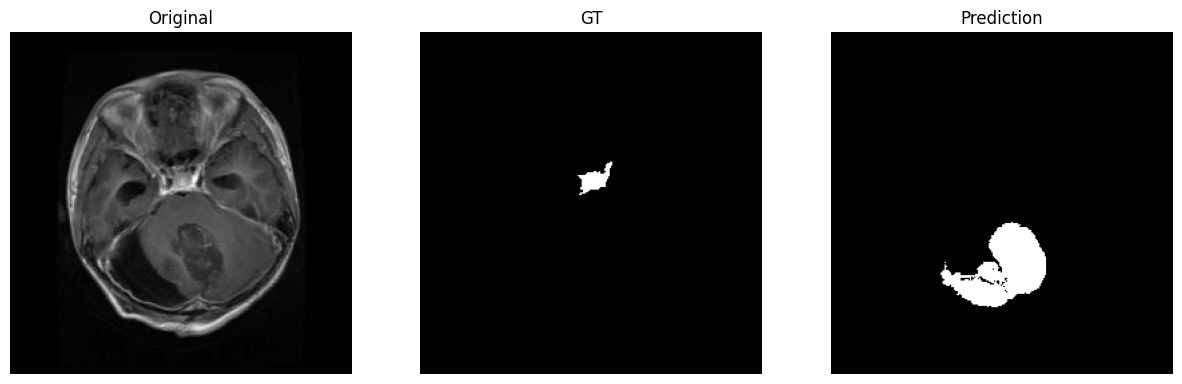

Full Image Dice: 0.0000 | IoU: 0.0000

Training finished.
Saved metrics CSV: training_metrics.csv
Saved loss curve: loss_curve.png
Saved metric curve: metric_curve.png
Saved combined curves: combined_curves.png


In [ ]:

# -----------------------
# MODEL DEFINITIONS
# -----------------------

class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, padding=1, stride=2, bias=False):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.projectionConv = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, padding=0, bias=False)
        self.relu = nn.ReLU(inplace=True)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.bn1 = nn.BatchNorm2d(in_channels)

    def forward(self, x):
        fx = self.bn1(x)
        fx = self.relu(fx)
        x_proj = self.projectionConv(x)
        fx = self.conv1(fx)
        fx = self.bn2(fx)
        fx = self.relu(fx)
        fx = self.conv2(fx)
        return torch.add(x_proj, fx)


class ConvBlock1(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, padding=1, stride=1, bias=False):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.projectionConv = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1, padding=0, bias=False)
        self.relu = nn.ReLU(inplace=True)
        self.bn = nn.BatchNorm2d(out_channels)

    def forward(self, x):
        fx = self.conv1(x)
        x_proj = self.projectionConv(x)
        fx = self.bn(fx)
        fx = self.relu(fx)
        fx = self.conv2(fx)
        return torch.add(x_proj, fx)


class ConvBlockDec(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.upconv = nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2, output_padding=0)
        self.ConvBlock = ConvBlock(2 * out_channels, out_channels, stride=1)

    def forward(self, x, skip_connection):
        x = self.upconv(x)
        x = torch.cat((x, skip_connection), dim=1)
        x = self.ConvBlock(x)
        return x


class ResUnet(nn.Module):
    def __init__(self, in_channels=1, out_channels=1):
        super().__init__()
        self.enc1 = ConvBlock1(in_channels, 64)
        self.enc2 = ConvBlock(64, 128)
        self.enc3 = ConvBlock(128, 256)
        self.enc4 = ConvBlock(256, 512)

        self.base = ConvBlock(512, 1024)

        self.dec4 = ConvBlockDec(1024, 512)
        self.dec3 = ConvBlockDec(512, 256)
        self.dec2 = ConvBlockDec(256, 128)
        self.dec1 = ConvBlockDec(128, 64)

        self.final_conv = nn.Conv2d(64, out_channels, kernel_size=1, bias=False)
        self._init_weights()

    def forward(self, x):
        s1 = self.enc1(x)
        s2 = self.enc2(s1)
        s3 = self.enc3(s2)
        s4 = self.enc4(s3)

        b = self.base(s4)

        d4 = self.dec4(b, s4)
        d3 = self.dec3(d4, s3)
        d2 = self.dec2(d3, s2)
        d1 = self.dec1(d2, s1)

        y = self.final_conv(d1)

        return y

    def _init_weights(self):
        for m in self.modules():
            if isinstance(m, (nn.Conv2d, nn.ConvTranspose2d)):
                nn.init.kaiming_normal_(m.weight, nonlinearity='relu')
                if m.bias is not None:
                    nn.init.zeros_(m.bias)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.ones_(m.weight)
                nn.init.zeros_(m.bias)

# -----------------------
# DEVICE + MODEL (moved early; model placed on device once)
# -----------------------

device = "cuda" if torch.cuda.is_available() else "cpu"
print("CUDA Available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("CUDA Device Name:", torch.cuda.get_device_name(0))

model = ResUnet().to(device)

# optional: model summary (works if torchsummary installed)
try:
    from torchsummary import summary
    summary(model, input_size=(1, 256, 256))
except Exception:
    pass

# -----------------------
# DATA PREPROCESSING
# -----------------------

# Z SCORE NORM
class PerImageZScore(A.ImageOnlyTransform):
    def __init__(self, p=1.0):
        super().__init__(p=p)

    def apply(self, img, **params):
        img = img.astype(np.float32)
        m = img.mean()
        s = img.std()
        if s < 1e-6:
            s = 1e-6
        return (img - m) / s


# CREATING PATCHES FROM DATASET
class EnhancedPatchDataset(Dataset):
    def __init__(self, image_paths, mask_paths, patch_size=256, overlap=0, transform=None, training=True):
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.patch_size = patch_size
        self.overlap = overlap
        self.transform = transform
        self.training = training
        self.patches = []
        self.create_patches()

    def create_patches(self):
        stride = self.patch_size - self.overlap if self.training else self.patch_size
        for ipath, mpath in zip(self.image_paths, self.mask_paths):
            img = cv2.imread(ipath, cv2.IMREAD_GRAYSCALE).astype(np.float32)
            mask = cv2.imread(mpath, cv2.IMREAD_GRAYSCALE)
            mask = (mask > 127).astype(np.float32)
            H, W = img.shape
            for i in range(0, H - self.patch_size + 1, stride):
                for j in range(0, W - self.patch_size + 1, stride):
                    img_patch = img[i:i + self.patch_size, j:j + self.patch_size]
                    mask_patch = mask[i:i + self.patch_size, j:j + self.patch_size]
                    if self.training and mask_patch.sum() < 100:
                        if np.random.random() > 0.1:
                            continue
                    self.patches.append((img_patch, mask_patch))
            if H % stride != 0 or W % stride != 0:
                remaining_patches = []
                if H % stride != 0:
                    for j in range(0, W - self.patch_size + 1, stride):
                        i = H - self.patch_size
                        img_patch = img[i:i + self.patch_size, j:j + self.patch_size]
                        mask_patch = mask[i:i + self.patch_size, j:j + self.patch_size]
                        remaining_patches.append((img_patch, mask_patch))
                if W % stride != 0:
                    for i in range(0, H - self.patch_size + 1, stride):
                        j = W - self.patch_size
                        img_patch = img[i:i + self.patch_size, j:j + self.patch_size]
                        mask_patch = mask[i:i + self.patch_size, j:j + self.patch_size]
                        remaining_patches.append((img_patch, mask_patch))
                if H % stride != 0 and W % stride != 0:
                    i, j = H - self.patch_size, W - self.patch_size
                    img_patch = img[i:i + self.patch_size, j:j + self.patch_size]
                    mask_patch = mask[i:i + self.patch_size, j:j + self.patch_size]
                    remaining_patches.append((img_patch, mask_patch))
                self.patches.extend(remaining_patches)

    def __len__(self):
        return len(self.patches)

    def __getitem__(self, idx):
        img, mask = self.patches[idx]
        img = np.expand_dims(img, axis=-1)
        mask = np.expand_dims(mask, axis=-1)

        if self.transform:
            augmented = self.transform(image=img, mask=mask)
            img = augmented['image']
            mask = augmented['mask']
        if isinstance(mask, np.ndarray):
            mask = torch.from_numpy(mask).float()
        if mask.ndim == 2:
            mask = mask.unsqueeze(0)
        elif mask.ndim == 3 and mask.shape[0] != 1:
            mask = mask.permute(2, 0, 1)

        return img.float(), mask.float()

# -----------------------
# AUGMENTATIONS
# -----------------------

train_transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.3),
    A.Rotate(limit=15, p=0.4),
    A.ElasticTransform(alpha=10, sigma=4, p=0.2),
    A.GaussNoise(var_limit=(5, 15), p=0.2),
    A.RandomBrightnessContrast(brightness_limit=0.15, contrast_limit=0.15, p=0.4),
    PerImageZScore(p=1.0),
    ToTensorV2()
])

test_transform = A.Compose([
    PerImageZScore(p=1.0),
    ToTensorV2()
])

# -----------------------
# LOAD DATASET (adjust paths as needed)
# -----------------------

train_images = sorted(glob("./archive/brisc2025/segmentation_input/train/images/*.jpg"))
train_masks = sorted(glob("./archive/brisc2025/segmentation_input/train/masks/*.png"))
test_images = sorted(glob("./archive/brisc2025/segmentation_input/test/images/*.jpg"))
test_masks = sorted(glob("./archive/brisc2025/segmentation_input/test/masks/*.png"))

print(f"Number of test images: {len(test_images)}")
print(f"Number of test masks: {len(test_masks)}")
print(f"Number of train images: {len(train_images)}")
print(f"Number of train masks: {len(train_masks)}")

train_dataset = EnhancedPatchDataset(
    train_images, train_masks,
    patch_size=256, overlap=0,
    transform=train_transform,
    training=True
)

test_dataset = EnhancedPatchDataset(
    test_images, test_masks,
    patch_size=256, overlap=0,
    transform=test_transform,
    training=False
)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True,num_workers=2, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False,num_workers=2, pin_memory=True)

# -----------------------
# LOSS / OPT / SCHEDULER
# -----------------------

def dice_loss(pred, target, smooth=1e-6):
    pred = torch.sigmoid(pred)
    intersection = (pred * target).sum(dim=(2, 3))
    union = pred.sum(dim=(2, 3)) + target.sum(dim=(2, 3))
    dice = (2 * intersection + smooth) / (union + smooth)
    return 1 - dice.mean()

class EnhancedLoss(nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self, logits, target):
        bce_loss = nn.functional.binary_cross_entropy_with_logits(logits, target)
        dice = dice_loss(logits, target)
        return 0.40 * bce_loss + 0.6 * dice

optimizer = optim.AdamW(model.parameters(), lr=2e-4, weight_decay=1e-5)
loss_fn = EnhancedLoss()

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.5, patience=2
)

# single global scaler (do not redefine inside train loop)
scaler = torch.amp.GradScaler()

# -----------------------
# INFERENCE HELPERS (fixed)
# -----------------------

def create_blend_mask(patch_size, blend_width):
    if blend_width <= 0:
        return np.ones((patch_size, patch_size), dtype=np.float32)
    mask = np.ones((patch_size, patch_size), dtype=np.float32)
    ramp = 0.5 * (1 - np.cos(np.linspace(0, np.pi, blend_width)))
    for i in range(blend_width):
        mask[i, :] *= ramp[i]        # top
        mask[-i-1, :] *= ramp[i]     # bottom
        mask[:, i] *= ramp[i]        # left
        mask[:, -i-1] *= ramp[i]     # right
    return mask

@torch.no_grad()
def predict_single_patch(model, image, device=device, patch_size=256):
    """
    If your image is exactly patch_size x patch_size and you want 1 patch = 1 image.
    image: numpy (H,W) or (H,W,1)
    returns: probability map (H,W)
    """
    model.eval()
    img = image.copy().astype(np.float32)
    if img.ndim == 3:
        img = img[..., 0]
    # normalize using image stats (same as training PerImageZScore)
    m, s = img.mean(), img.std() + 1e-6
    img_norm = (img - m) / s
    tensor = torch.from_numpy(img_norm).float().unsqueeze(0).unsqueeze(0).to(device)  # (1,1,H,W)
    with torch.cuda.amp.autocast(), torch.no_grad():
        logits = model(tensor)
        prob = torch.sigmoid(logits)[0, 0].cpu().numpy()
    return prob

@torch.no_grad()
def predict_tiles_no_overlap(model, image, patch_size=256, device=device, batch_size=8):
    """
    Predict using non-overlapping patches of size patch_size.
    Each tile is processed independently (no overlap, no blending).
    Edges are handled with reflect padding so each tile fed to model is patch_size.
    Returns stitched probability map with same H,W as input.
    """
    model.eval()
    H, W = image.shape[:2]
    n_h = int(np.ceil(H / patch_size))
    n_w = int(np.ceil(W / patch_size))

    # Prepare output buffer
    prediction = np.zeros((H, W), dtype=np.float32)

    tiles = []
    coords = []

    # Create all tiles
    for i in range(n_h):
        for j in range(n_w):
            sh = i * patch_size
            sw = j * patch_size
            eh = min(sh + patch_size, H)
            ew = min(sw + patch_size, W)
            tile = image[sh:eh, sw:ew].astype(np.float32)
            # pad to patch_size with reflect
            pad_h = patch_size - tile.shape[0]
            pad_w = patch_size - tile.shape[1]
            if pad_h > 0 or pad_w > 0:
                tile = np.pad(tile, ((0, pad_h), (0, pad_w)), mode='reflect')
            tiles.append(tile)
            coords.append((sh, eh, sw, ew, pad_h, pad_w))

    if len(tiles) == 0:
        return prediction

    # ensure device string and model device agree; move model only if required
    target_dev = torch.device(device if torch.cuda.is_available() else 'cpu')
    model_dev = next(model.parameters()).device
    if model_dev != target_dev:
        model.to(target_dev)

    total_tiles = len(tiles)
    idx = 0
    while idx < total_tiles:
        start_idx = idx
        batch_tiles = tiles[idx: idx + batch_size]
        idx += len(batch_tiles)  # actual size for this batch
        batch_np = np.stack(batch_tiles, axis=0)  # (B,H,W)

        # normalize per-tile (PerImageZScore behavior)
        batch_t = []
        for t in batch_np:
            m_t, s_t = t.mean(), t.std() + 1e-6
            batch_t.append((t - m_t) / s_t)
        batch_t = np.stack(batch_t, axis=0)
        batch_t = torch.from_numpy(batch_t).float().unsqueeze(1).to(target_dev)  # (B,1,H,W)

        with torch.cuda.amp.autocast(), torch.no_grad():
            logits = model(batch_t)
            probs = torch.sigmoid(logits).cpu().numpy()[:, 0]  # (B,H,W)

        # write back outputs to prediction
        for k, prob in enumerate(probs):
            sh, eh, sw, ew, pad_h, pad_w = coords[start_idx + k]
            h_crop = patch_size - pad_h
            w_crop = patch_size - pad_w
            prob_cropped = prob[:h_crop, :w_crop]
            prediction[sh:eh, sw:ew] = prob_cropped

    return prediction

# -----------------------
# TRAIN / EVAL / TEST FUNCTIONS
# -----------------------

def train_fn(loader, model, optimizer, loss_fn, device, scaler):
    model.train()
    total_loss = 0.0

    loop = tqdm(loader, desc="Training", leave=False)
    for imgs, masks in loop:
        imgs, masks = imgs.to(device, non_blocking=True), masks.to(device, non_blocking=True)

        optimizer.zero_grad()

        with torch.cuda.amp.autocast():
            logits = model(imgs)

            if logits.dim() == 4 and masks.dim() == 3:
                masks = masks.unsqueeze(1)

            loss = loss_fn(logits, masks)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        total_loss += loss.item()
        loop.set_postfix(loss=loss.item())

    return total_loss / max(1, len(loader))

@torch.no_grad()
def eval_fn(loader, model, loss_fn, device):
    model.eval()
    total_loss = 0.0

    dice_list = []
    iou_list = []
    pixel_correct = 0
    total_pixels = 0

    for imgs, masks in loader:
        imgs, masks = imgs.to(device, non_blocking=True), masks.to(device, non_blocking=True)

        logits = model(imgs)

        if logits.dim() == 4 and masks.dim() == 3:
            masks = masks.unsqueeze(1)

        loss = loss_fn(logits, masks)
        total_loss += loss.item()

        preds = torch.sigmoid(logits)
        preds_bin = (preds > 0.45).float()

        pixel_correct += (preds_bin == masks).sum().item()
        total_pixels += masks.numel()

        inter = (preds_bin * masks).sum(dim=(1, 2, 3))
        pred_sum = preds_bin.sum(dim=(1, 2, 3))
        mask_sum = masks.sum(dim=(1, 2, 3))
        union = pred_sum + mask_sum - inter

        dice = (2 * inter + 1e-7) / (pred_sum + mask_sum + 1e-7)
        iou = (inter + 1e-7) / (union + 1e-7)

        dice_list.append(dice.mean().item())
        iou_list.append(iou.mean().item())

    pixel_acc = pixel_correct / total_pixels
    pixel_err = 1 - pixel_acc

    return total_loss / len(loader), pixel_acc, pixel_err, np.mean(dice_list), np.mean(iou_list)

@torch.no_grad()
def test_full_image_inference(patch_size=256, batch_size=8, threshold=0.45):
    if len(test_images) == 0:
        print("No test images found!")
        return

    test_img_path = test_images[0]
    test_mask_path = test_masks[0]

    image = cv2.imread(test_img_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Failed to read test image:", test_img_path)
        return

    ground_truth = cv2.imread(test_mask_path, cv2.IMREAD_GRAYSCALE)
    if ground_truth is None:
        print("Failed to read test mask:", test_mask_path)
        return

    # convert GT to binary float
    ground_truth = (ground_truth > 127).astype(np.uint8)

    print(f"Testing on image: {test_img_path}")
    print(f"Image shape: {image.shape}")
    # debug prints for device/shape sanity
    print("Model device:", next(model.parameters()).device)
    print("Model training mode?:", model.training)

    # Use non-overlapping tiled prediction (1 patch == 1 tile)
    prediction = predict_tiles_no_overlap(model, image, patch_size=patch_size, device=device, batch_size=batch_size)

    # Binarize
    prediction_bin = (prediction > threshold).astype(np.uint8)

    # Plot: original | GT | prediction
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(ground_truth, cmap='gray')
    plt.title("GT")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(prediction_bin, cmap='gray')
    plt.title("Prediction")
    plt.axis('off')

    plt.show()

    # compute overlap metrics (handle empty predictions/gt)
    intersection = (prediction_bin * ground_truth).sum()
    pred_sum = prediction_bin.sum()
    gt_sum = ground_truth.sum()
    union = pred_sum + gt_sum - intersection

    if pred_sum + gt_sum == 0:
        dice = 1.0 if pred_sum == gt_sum else 0.0
    else:
        dice = (2 * intersection + 1e-7) / (pred_sum + gt_sum + 1e-7)

    if union == 0:
        iou = 1.0 if pred_sum == gt_sum else 0.0
    else:
        iou = (intersection + 1e-7) / (union + 1e-7)

    print(f"Full Image Dice: {dice:.4f} | IoU: {iou:.4f}")

# -----------------------
# TRAIN LOOP
# -----------------------

# def train_model(epochs=40, save_checkpoint=True):
#     best_dice = 0.0

#     for epoch in range(1, epochs + 1):
#         print(f"\nEpoch [{epoch}/{epochs}]")

#         train_loss = train_fn(train_loader, model, optimizer, loss_fn, device, scaler)
#         val_loss, pixel_acc, pixel_err, dice, iou = eval_fn(test_loader, model, loss_fn, device)

#         scheduler.step(val_loss)

#         print(f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | "
#               f"Pixel Acc: {pixel_acc*100:.2f}% | Pixel Err: {pixel_err*100:.2f}% | "
#               f"Dice: {dice:.4f} | IoU: {iou:.4f}")

#         if save_checkpoint and dice > best_dice:
#             best_dice = dice
#             torch.save({
#                 'epoch': epoch,
#                 'model_state_dict': model.state_dict(),
#                 'optimizer_state_dict': optimizer.state_dict(),
#                 'dice': dice
#             }, "BTresunet_model.pth")
#             print(f"Saved best model! Dice={dice:.4f}")

#         if epoch % 5 == 0:
#             # call test - functions already use no_grad and set eval
#             test_full_image_inference()

# if __name__ == "__main__":
#     train_model(epochs=40)
# -----------------------
# METRICS LOGGING + PLOTTING HELPERS
# -----------------------
import csv
import os
import matplotlib.pyplot as plt

# Lists to store metrics per epoch
metrics = {
    "epoch": [],
    "train_loss": [],
    "val_loss": [],
    "pixel_acc": [],
    "pixel_err": [],
    "dice": [],
    "iou": []
}

def save_metrics_csv(path="training_metrics.csv"):
    os.makedirs(os.path.dirname(path) or ".", exist_ok=True)
    with open(path, "w", newline="") as f:
        writer = csv.writer(f)
        header = ["epoch", "train_loss", "val_loss", "pixel_acc", "pixel_err", "dice", "iou"]
        writer.writerow(header)
        for i in range(len(metrics["epoch"])):
            writer.writerow([
                metrics["epoch"][i],
                metrics["train_loss"][i],
                metrics["val_loss"][i],
                metrics["pixel_acc"][i],
                metrics["pixel_err"][i],
                metrics["dice"][i],
                metrics["iou"][i]
            ])

def plot_loss_curve(save_path="loss_curve.png"):
    plt.figure(figsize=(8,6))
    plt.plot(metrics["epoch"], metrics["train_loss"], label="Train Loss")
    plt.plot(metrics["epoch"], metrics["val_loss"], label="Val Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training & Validation Loss")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(save_path)
    plt.close()

def plot_metric_curve(save_path="metric_curve.png"):
    plt.figure(figsize=(8,6))
    plt.plot(metrics["epoch"], metrics["dice"], label="Dice")
    plt.plot(metrics["epoch"], metrics["iou"], label="IoU")
    plt.xlabel("Epoch")
    plt.ylabel("Score")
    plt.title("Dice & IoU over Epochs")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(save_path)
    plt.close()

# Optional: a single combined figure
def plot_combined(save_path="combined_curves.png"):
    fig, ax = plt.subplots(1, 2, figsize=(14,6))
    # Loss
    ax[0].plot(metrics["epoch"], metrics["train_loss"], label="Train Loss")
    ax[0].plot(metrics["epoch"], metrics["val_loss"], label="Val Loss")
    ax[0].set_xlabel("Epoch"); ax[0].set_ylabel("Loss"); ax[0].set_title("Loss")
    ax[0].legend(); ax[0].grid(True)
    # Metrics
    ax[1].plot(metrics["epoch"], metrics["dice"], label="Dice")
    ax[1].plot(metrics["epoch"], metrics["iou"], label="IoU")
    ax[1].set_xlabel("Epoch"); ax[1].set_ylabel("Score"); ax[1].set_title("Dice & IoU")
    ax[1].legend(); ax[1].grid(True)
    plt.tight_layout()
    plt.savefig(save_path)
    plt.close()

# -----------------------
# TRAIN LOOP (modified)
# -----------------------
def train_model(epochs=40, save_checkpoint=True, ckpt_path="BTresunet_model.pth"):
    best_dice = 0.0

    # Clear metrics each run
    for k in metrics.keys():
        metrics[k].clear()

    for epoch in range(1, epochs + 1):
        print(f"\nEpoch [{epoch}/{epochs}]")

        train_loss = train_fn(train_loader, model, optimizer, loss_fn, device, scaler)
        val_loss, pixel_acc, pixel_err, dice, iou = eval_fn(test_loader, model, loss_fn, device)

        scheduler.step(val_loss)

        print(f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | "
              f"Pixel Acc: {pixel_acc*100:.2f}% | Pixel Err: {pixel_err*100:.2f}% | "
              f"Dice: {dice:.4f} | IoU: {iou:.4f}")

        # Log metrics
        metrics["epoch"].append(epoch)
        metrics["train_loss"].append(train_loss)
        metrics["val_loss"].append(val_loss)
        metrics["pixel_acc"].append(pixel_acc)
        metrics["pixel_err"].append(pixel_err)
        metrics["dice"].append(dice)
        metrics["iou"].append(iou)

        # Save best checkpoint
        if save_checkpoint and dice > best_dice:
            best_dice = dice
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'dice': dice
            }, ckpt_path)
            print(f"Saved best model! Dice={dice:.4f}")

        # Save curves every epoch (so you can inspect mid-training)
        save_metrics_csv("training_metrics.csv")
        plot_loss_curve("loss_curve.png")
        plot_metric_curve("metric_curve.png")
        plot_combined("combined_curves.png")

        # Optionally run full-image test every N epochs (you had this at every 5)
        if epoch % 5 == 0:
            test_full_image_inference()

    # Final prints and saved artifacts
    print("\nTraining finished.")
    print(f"Saved metrics CSV: training_metrics.csv")
    print(f"Saved loss curve: loss_curve.png")
    print(f"Saved metric curve: metric_curve.png")
    print(f"Saved combined curves: combined_curves.png")

# -----------------------
# QUICK EVAL ON SAVED CHECKPOINT (optional helper)
# -----------------------
def load_and_evaluate(ckpt_path="BTresunet_model.pth", loader=None):
    if not os.path.exists(ckpt_path):
        print("Checkpoint not found:", ckpt_path)
        return
    ckpt = torch.load(ckpt_path, map_location=device)
    model.load_state_dict(ckpt['model_state_dict'])
    print("Loaded checkpoint from epoch", ckpt.get('epoch', '?'), "dice:", ckpt.get('dice', '?'))
    if loader is None:
        loader = test_loader
    val_loss, pixel_acc, pixel_err, dice, iou = eval_fn(loader, model, loss_fn, device)
    print(f"Eval on loader -> Val Loss: {val_loss:.4f} | Pixel Acc: {pixel_acc*100:.2f}% | Dice: {dice:.4f} | IoU: {iou:.4f}")
    return val_loss, pixel_acc, pixel_err, dice, iou

# -----------------------
# RUN TRAIN (example)
# -----------------------
if __name__ == "__main__":
    train_model(epochs=40, save_checkpoint=True)




======= RESUMING TRAINING FOR 10 MORE EPOCHS =======

New LR set to: 1e-05

Epoch [1/10]


Training:   0%|          | 0/245 [00:00<?, ?it/s]/tmp/ipython-input-1030804771.py:411: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Train Loss: 0.3148 | Val Loss: 0.1059 | Pixel Acc: 99.55% | Pixel Err: 0.45% | Dice: 0.8437 | IoU: 0.7714
Saved best model! Dice=0.8437

Epoch [2/10]


Train Loss: 0.3166 | Val Loss: 0.1055 | Pixel Acc: 99.54% | Pixel Err: 0.46% | Dice: 0.8440 | IoU: 0.7704
Saved best model! Dice=0.8440

Epoch [3/10]


Train Loss: 0.3146 | Val Loss: 0.1077 | Pixel Acc: 99.55% | Pixel Err: 0.45% | Dice: 0.8412 | IoU: 0.7685

Epoch [4/10]


Train Loss: 0.3151 | Val Loss: 0.1065 | Pixel Acc: 99.55% | Pixel Err: 0.45% | Dice: 0.8427 | IoU: 0.7706

Epoch [5/10]


Train Loss: 0.3137 | Val Loss: 0.1055 | Pixel Acc: 99.54% | Pixel Err: 0.46% | Dice: 0.8439 | IoU: 0.7701
Testing on image: ./archive/brisc2025/segmentation_input/test/images/brisc2025_test_00001_gl_ax_t1.jpg
Image shape: (256, 256)
Model device: cuda:0
Model training mode?: False


/tmp/ipython-input-1030804771.py:383: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(), torch.no_grad():


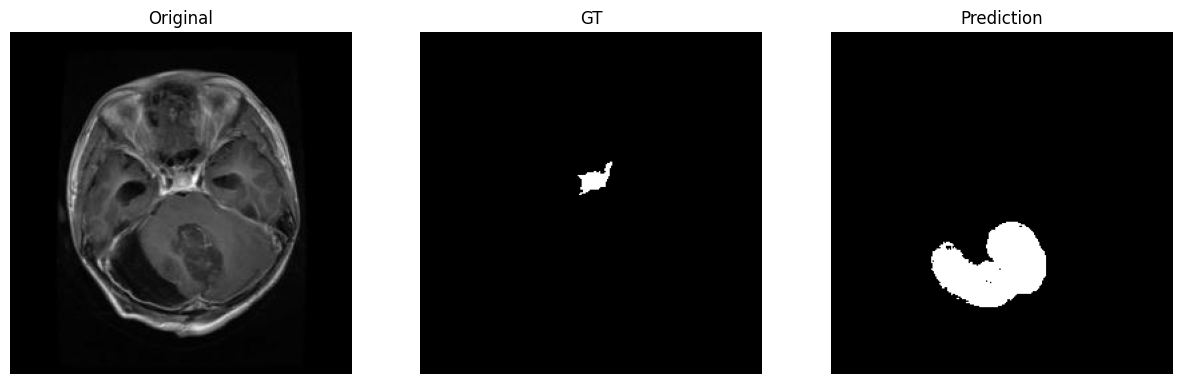

Full Image Dice: 0.0000 | IoU: 0.0000

Epoch [6/10]


Train Loss: 0.3129 | Val Loss: 0.1049 | Pixel Acc: 99.55% | Pixel Err: 0.45% | Dice: 0.8448 | IoU: 0.7723
Saved best model! Dice=0.8448

Epoch [7/10]


Train Loss: 0.3147 | Val Loss: 0.1059 | Pixel Acc: 99.54% | Pixel Err: 0.46% | Dice: 0.8431 | IoU: 0.7698

Epoch [8/10]


Train Loss: 0.3158 | Val Loss: 0.1047 | Pixel Acc: 99.55% | Pixel Err: 0.45% | Dice: 0.8455 | IoU: 0.7727
Saved best model! Dice=0.8455

Epoch [9/10]


Train Loss: 0.3158 | Val Loss: 0.1064 | Pixel Acc: 99.55% | Pixel Err: 0.45% | Dice: 0.8423 | IoU: 0.7694

Epoch [10/10]


Train Loss: 0.3169 | Val Loss: 0.1062 | Pixel Acc: 99.55% | Pixel Err: 0.45% | Dice: 0.8430 | IoU: 0.7709
Testing on image: ./archive/brisc2025/segmentation_input/test/images/brisc2025_test_00001_gl_ax_t1.jpg
Image shape: (256, 256)
Model device: cuda:0
Model training mode?: False


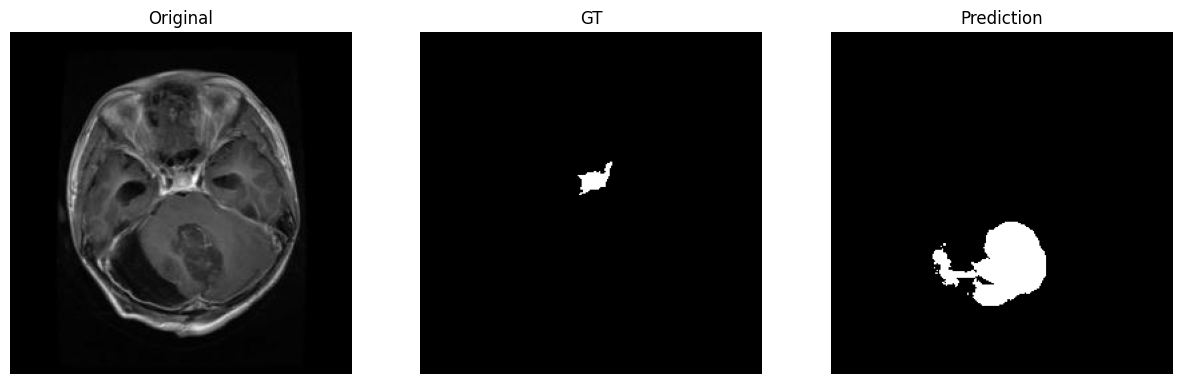

Full Image Dice: 0.0000 | IoU: 0.0000

Training finished.
Saved metrics CSV: training_metrics.csv
Saved loss curve: loss_curve.png
Saved metric curve: metric_curve.png
Saved combined curves: combined_curves.png


In [ ]:
if __name__ == "__main__":

    # --------------------------
    # Resume: train 10 more epochs
    # --------------------------

    print("\n======= RESUMING TRAINING FOR 10 MORE EPOCHS =======\n")

    # Load best checkpoint first (recommended)
    ckpt = torch.load("BTresunet_model.pth", map_location=device, weights_only=False)
    model.load_state_dict(ckpt["model_state_dict"])
    optimizer.load_state_dict(ckpt["optimizer_state_dict"])

    # Reduce LR for fine-tuning
    for g in optimizer.param_groups:
        g['lr'] = 1e-5   # (or 5e-5)
    print("New LR set to:", optimizer.param_groups[0]['lr'])

    # Run 10 additional epochs
    train_model(epochs=10, save_checkpoint=True)

Using device: cuda
Checkpoint loaded (strict=True).


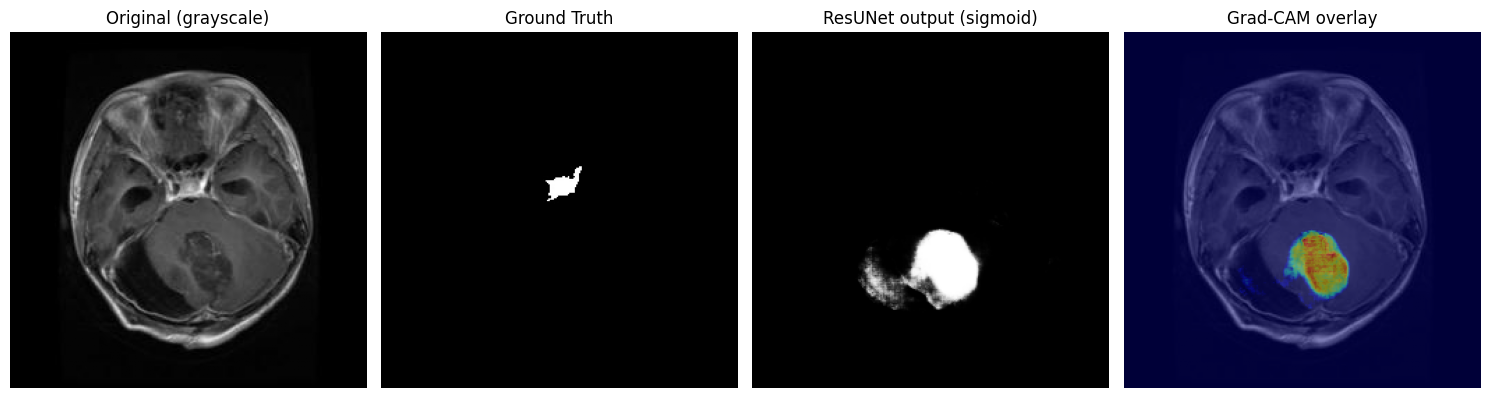

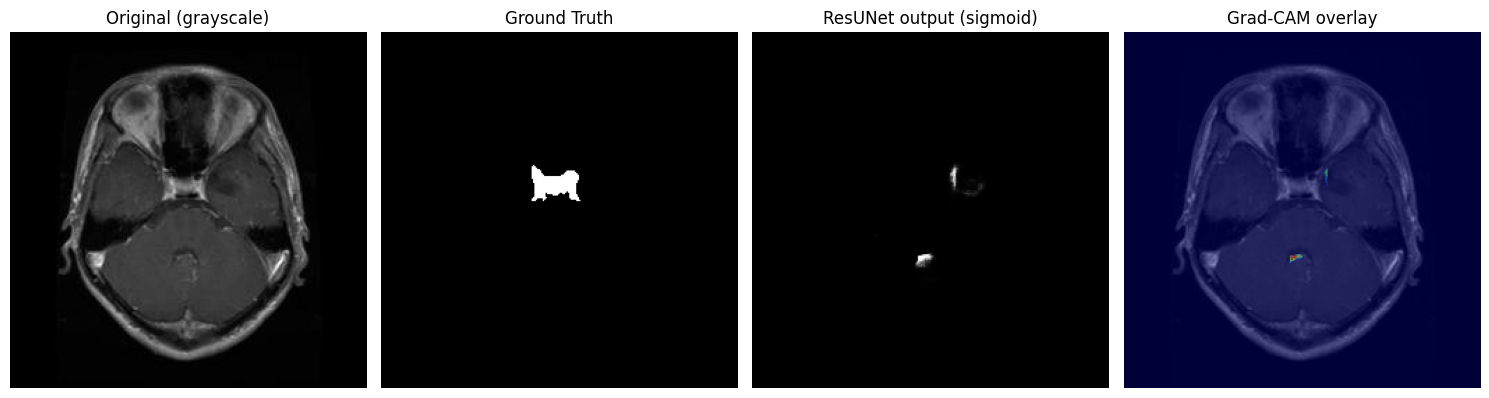

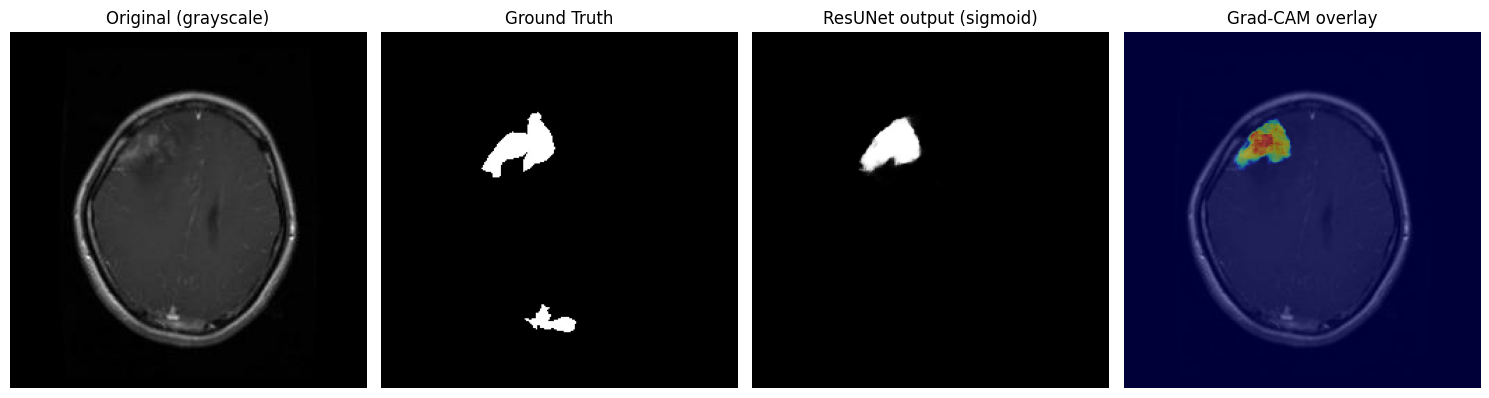

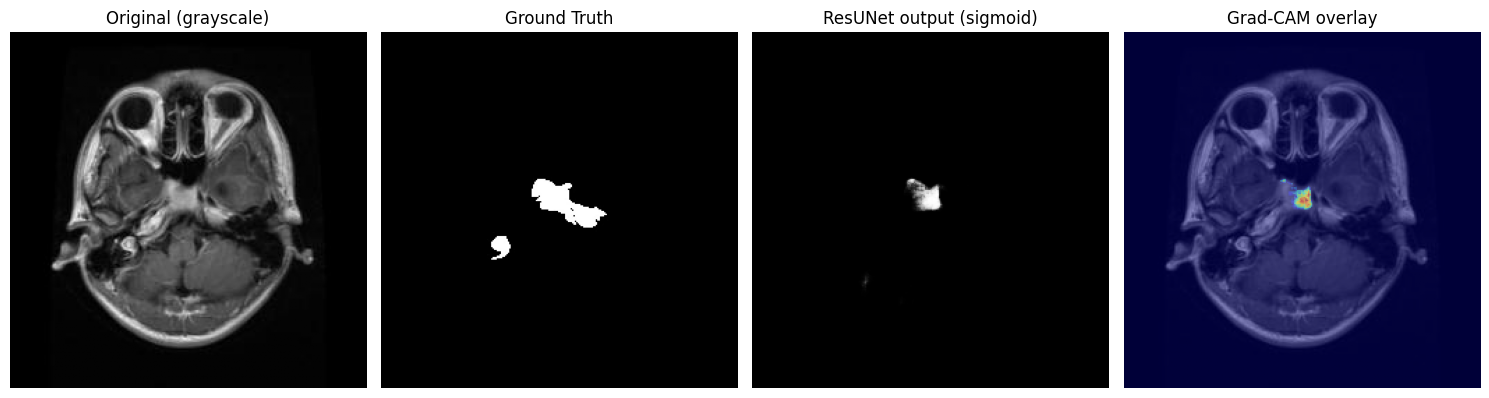

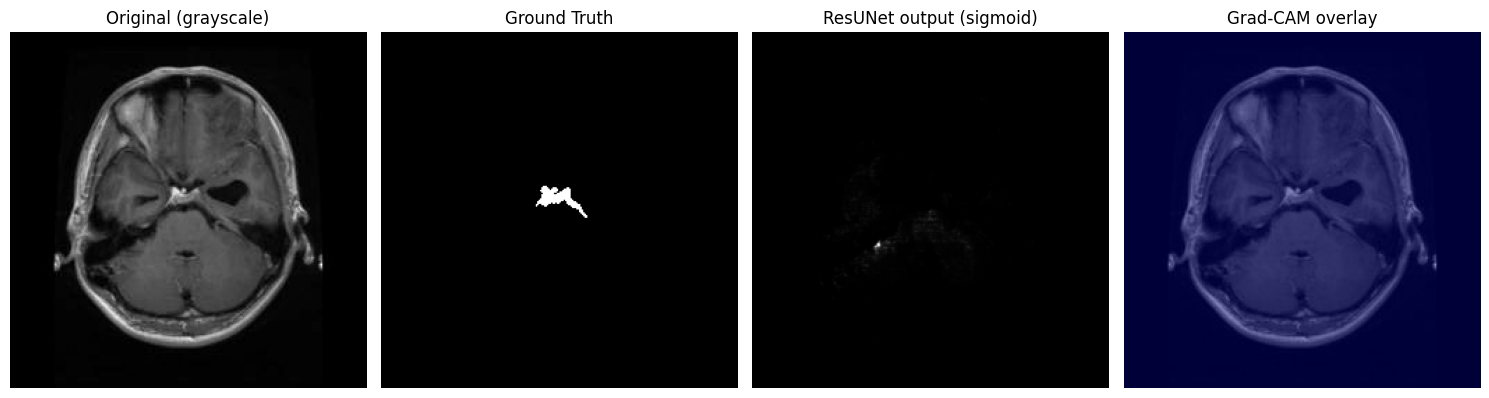

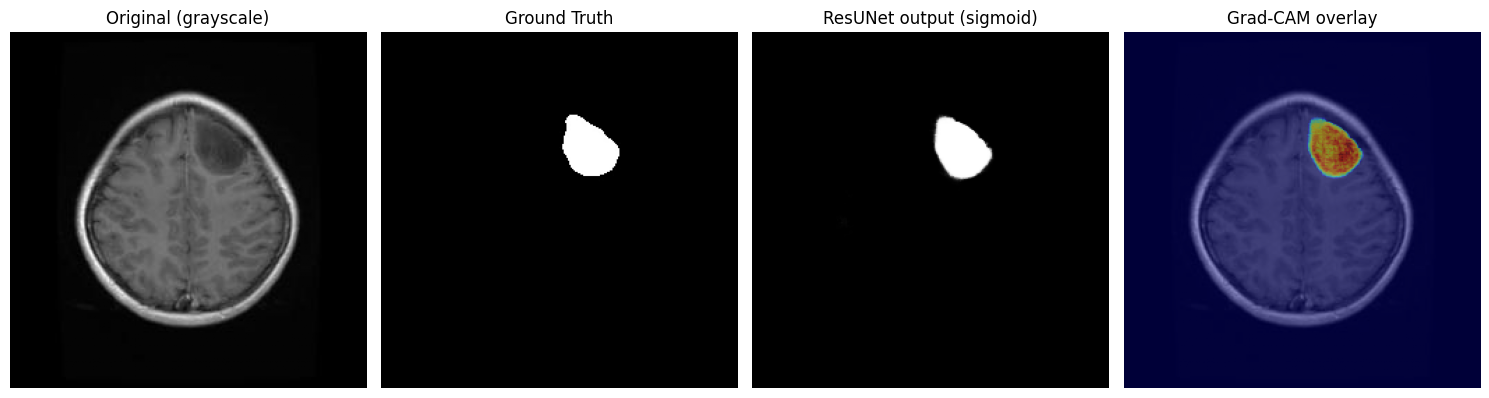

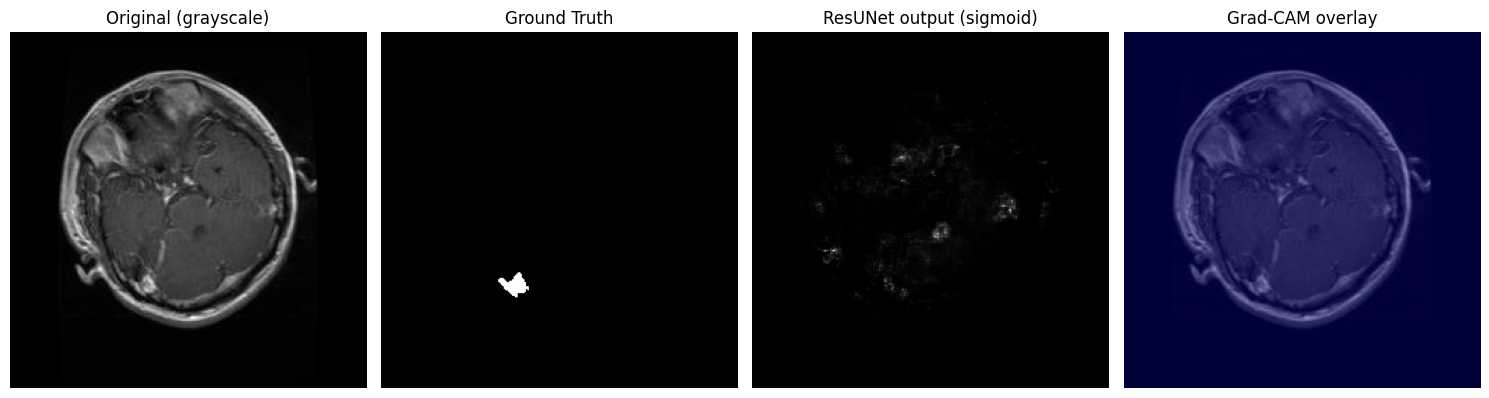

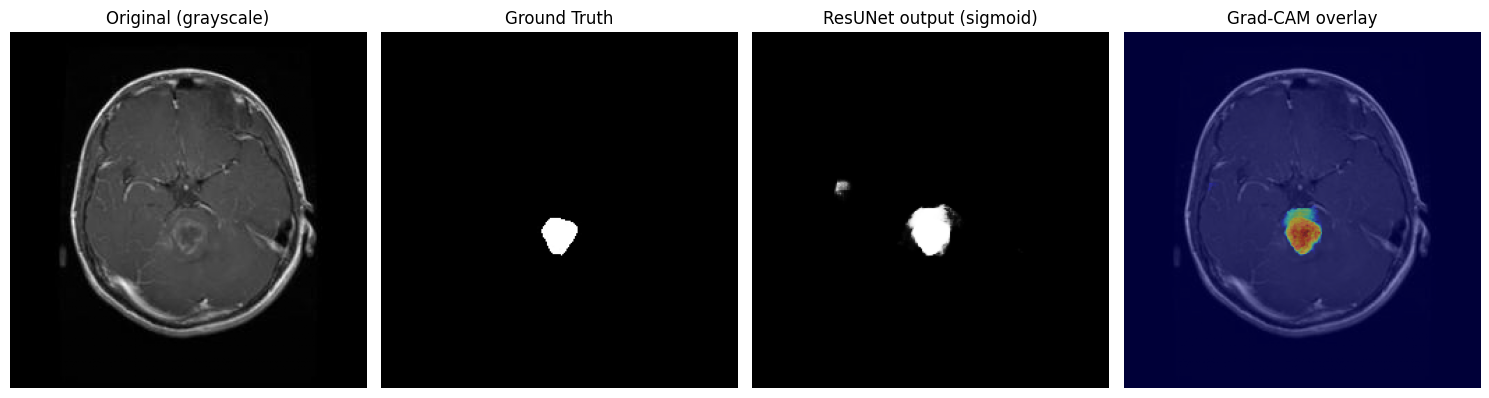

In [ ]:

# ------------------ Grad-CAM ------------------
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        self._register_hooks()

    def _register_hooks(self):
        def forward_hook(module, input, output):
            self.activations = output.detach()
        def backward_hook(module, grad_in, grad_out):
            self.gradients = grad_out[0].detach()
        self.target_layer.register_forward_hook(forward_hook);
        self.target_layer.register_full_backward_hook(backward_hook);

    def __call__(self, x, mode="sum"):
        self.model.zero_grad()
        output = self.model(x)   # shape (N, C, H, W)
        if mode == "center":
            target = output[0, 0, output.shape[2] // 2, output.shape[3] // 2]
        else:
            target = output.sum()
        target.backward(retain_graph=True)
        weights = self.gradients.mean(dim=(2, 3), keepdim=True)
        grad_cam_map = F.relu((weights * self.activations).sum(dim=1, keepdim=True))
        grad_cam_map = F.interpolate(grad_cam_map, size=x.shape[2:], mode='bilinear', align_corners=False)
        return grad_cam_map.squeeze().cpu().numpy(), output

# ------------------ Repro / Device ------------------
torch.manual_seed(42)
np.random.seed(42)
torch.backends.cudnn.benchmark = True
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)

# ------------------ Instantiate model and load checkpoint ------------------
model = ResUnet(in_channels=1, out_channels=1).to(device)
ckpt_path = '/content/BTresunet_model.pth'  # update path if needed
ckpt = torch.load(ckpt_path, map_location=device, weights_only=False)
try:
    model.load_state_dict(ckpt['model_state_dict'])
    print("Checkpoint loaded (strict=True).")
except Exception as e:
    print("Strict load failed:", e)
    # try forgiving load (handles 'module.' prefixes etc.)
    state_dict = ckpt['model_state_dict']
    new_state = {}
    for k, v in state_dict.items():
        new_k = k.replace('module.', '') if k.startswith('module.') else k
        new_state[new_k] = v
    model.load_state_dict(new_state, strict=False)
    print("Checkpoint loaded with strict=False (prefixes handled).")

model.eval()

# ------------------ Grad-CAM target layer ------------------
# final_conv is fine; for richer features consider e.g. model.enc3.conv2
target_layer = model.final_conv
grad_cam = GradCAM(model, target_layer)


for i in range(1,9):
  # ------------------ Input (KEEP 1-channel) ------------------
  image_path = f'/content/archive/brisc2025/segmentation_input/test/images/brisc2025_test_0000{i}_gl_ax_t1.jpg'  # change if needed
  img_pil = Image.open(image_path).convert('L')   # grayscale
  img = np.array(img_pil).astype(np.float32)     # H x W (single channel)

  mask_path = f'/content/archive/brisc2025/segmentation_input/test/masks/brisc2025_test_0000{i}_gl_ax_t1.png'  # change if needed
  mask_pil = Image.open(mask_path).convert('L')   # grayscale
  mask = np.array(mask_pil).astype(np.float32)     # H x W (single channel)

  test_transform = A.Compose([
      PerImageZScore(p=1.0),   # returns normalized HxW float32
      ToTensorV2()             # converts to (C=1, H, W)
  ])

  aug = test_transform(image=img)
  x = aug['image'].unsqueeze(0).to(device)  # shape: (1,1,H,W)

  # ------------------ Run Grad-CAM (need gradients) ------------------
  # Grad-CAM does backward on model outputs, so don't wrap in torch.no_grad()
  cam_map, output = grad_cam(x, mode="sum")  # cam_map: HxW numpy

  # normalize cam_map to [0,1]
  cam_map = cam_map - cam_map.min()
  if cam_map.max() > 0:
      cam_map = cam_map / cam_map.max()

  # segmentation probabilities via sigmoid
  output_prob = torch.sigmoid(output).squeeze().cpu().detach().numpy()  # (H,W) for single-channel

  # ------------------ Plot ------------------
  plt.figure(figsize=(15,5))

  plt.subplot(1,4,1)
  plt.imshow(img, cmap='gray')
  plt.axis('off')
  plt.title("Original (grayscale)")

  plt.subplot(1,4,2)
  plt.imshow(mask, cmap='gray')
  plt.axis('off')
  plt.title("Ground Truth")

  plt.subplot(1,4,3)
  plt.imshow(output_prob, cmap='gray')
  plt.axis('off')
  plt.title("ResUNet output (sigmoid)")

  plt.subplot(1,4,4)
  plt.imshow(img, cmap='gray')
  plt.imshow(cam_map, cmap='jet', alpha=0.45)
  plt.axis('off')
  plt.title("Grad-CAM overlay")


  plt.tight_layout()
  plt.show()
